In [1]:
# Importing necesessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
data = pd.read_csv(r"C:\Users\joelf\Downloads\adjusted_augmented_user_data.csv")

In [3]:
data.head()

,avg_mouse_x,avg_mouse_y,num_clicks,scroll_speed,typing_speed,label
0,707.942257,164.724409,14,2761.096476,45.272704,bot
1,681.133848,289.858430,5,1331.853986,340.421281,authorized
2,652.297229,292.005038,3,405.633589,439.889987,authorized
3,845.972973,396.853282,25,2251.181262,56.071043,bot
4,723.574850,395.793413,24,2428.346825,41.191255,bot


## Performing EDA on Our Dataset

In [4]:
print("Missing Values Per Column:")
print(data.isnull().sum(), "\n")

Missing Values Per Column:
avg_mouse_x     0
avg_mouse_y     0
num_clicks      0
scroll_speed    0
typing_speed    0
label           0
dtype: int64 



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

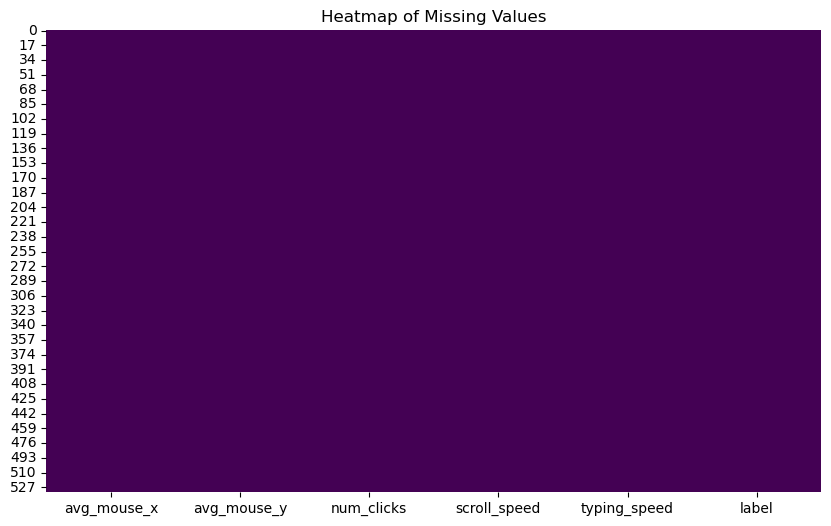

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [7]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
print("Numerical Columns:", numerical_columns, "\n")

Numerical Columns: Index(['avg_mouse_x', 'avg_mouse_y', 'num_clicks', 'scroll_speed',
       'typing_speed'],
      dtype='object') 



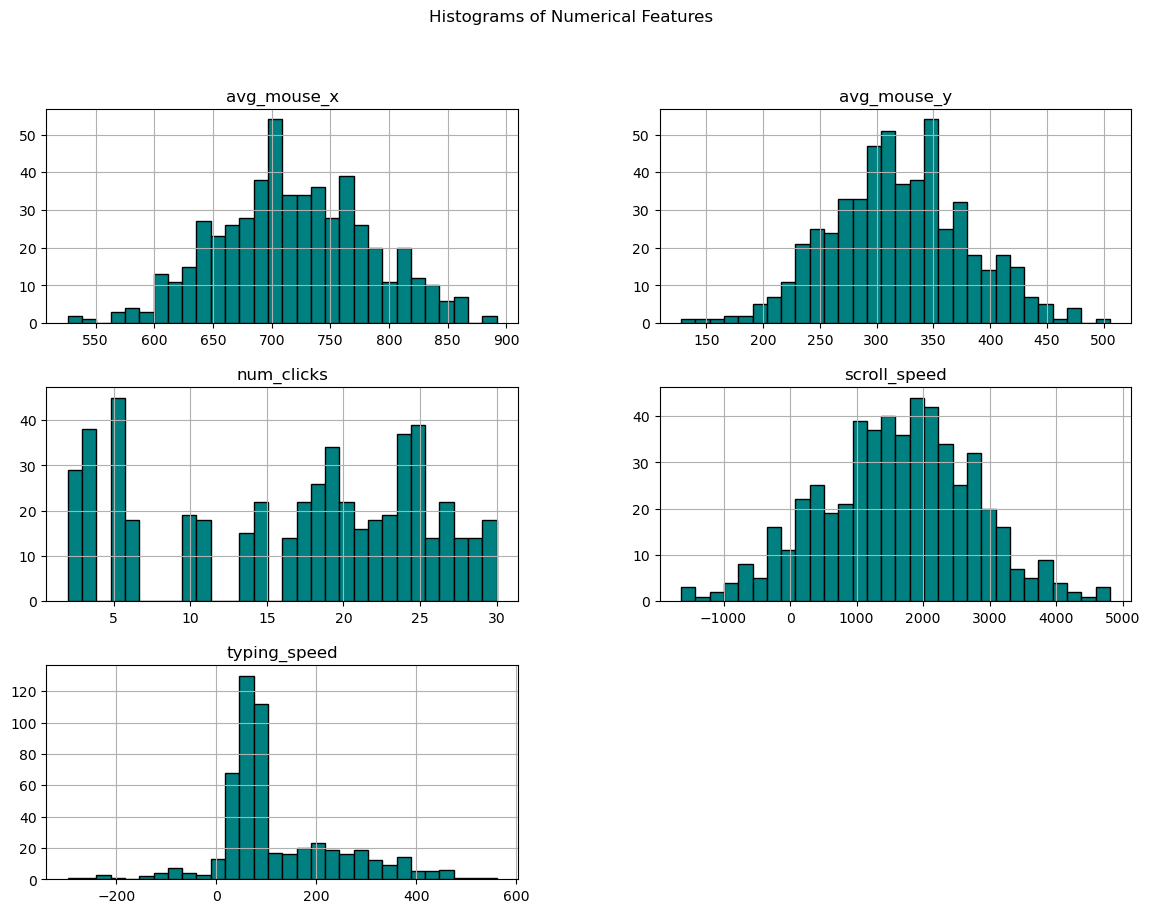

In [8]:
data[numerical_columns].hist(figsize=(14, 10), bins=30, color='teal', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

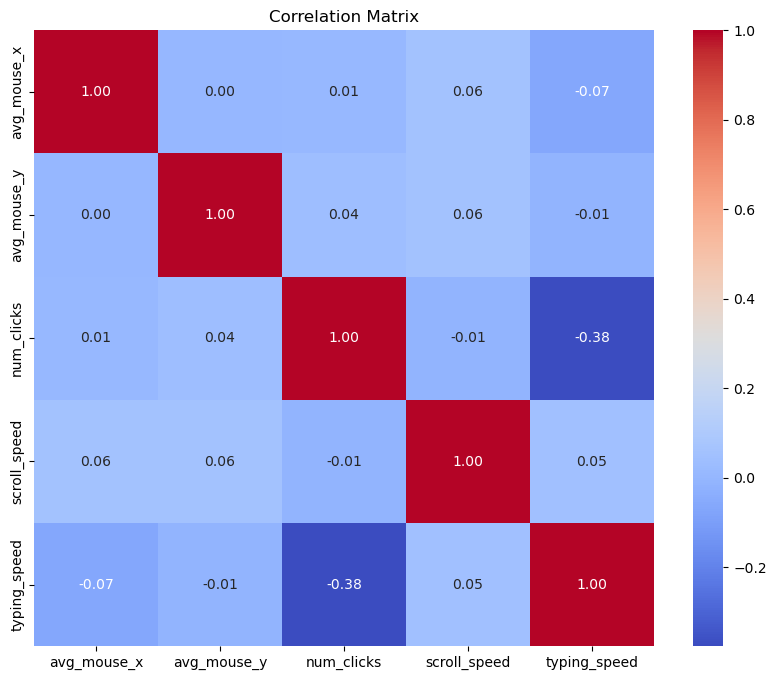

In [9]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [10]:
categorical_columns = data.select_dtypes(include=[object]).columns
print("Categorical Columns:", categorical_columns, "\n")

Categorical Columns: Index(['label'], dtype='object') 



C:\Users\joelf\AppData\Local\Temp\ipykernel_27236\2711409620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette="viridis")


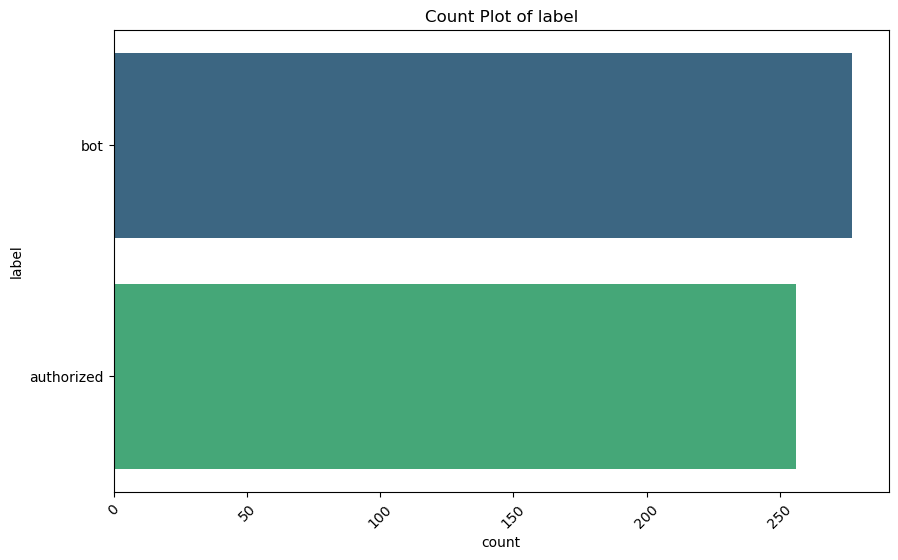

In [11]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col], palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

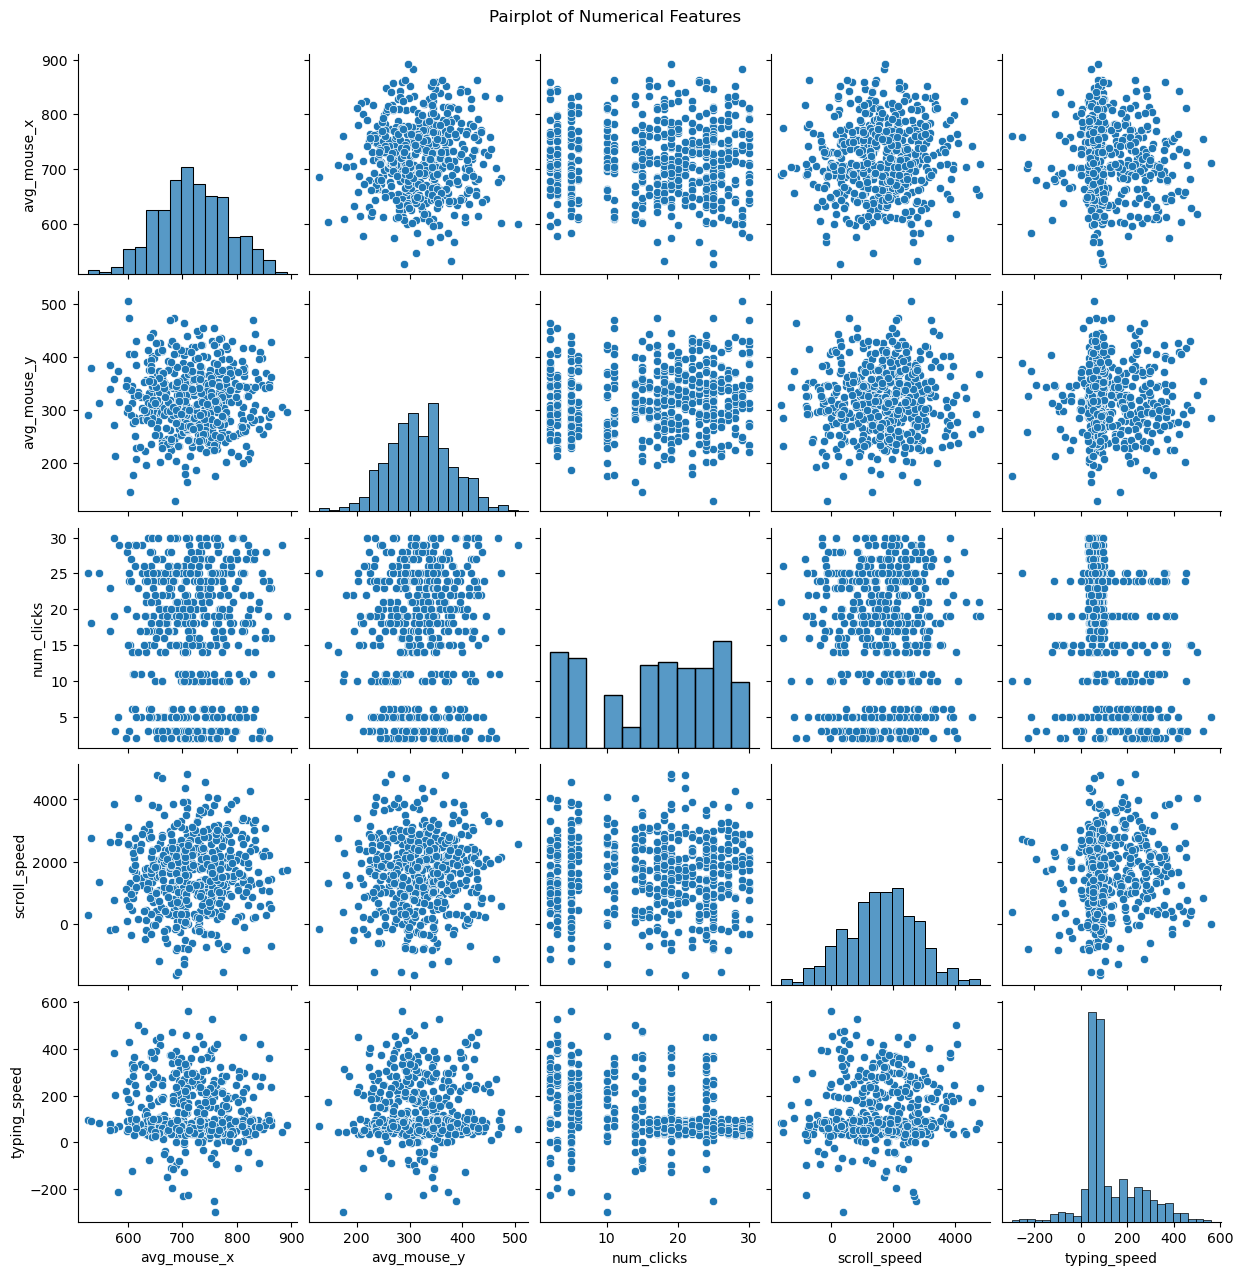

In [12]:
sns.pairplot(data[numerical_columns])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

C:\Users\joelf\AppData\Local\Temp\ipykernel_27236\3065027341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set2")


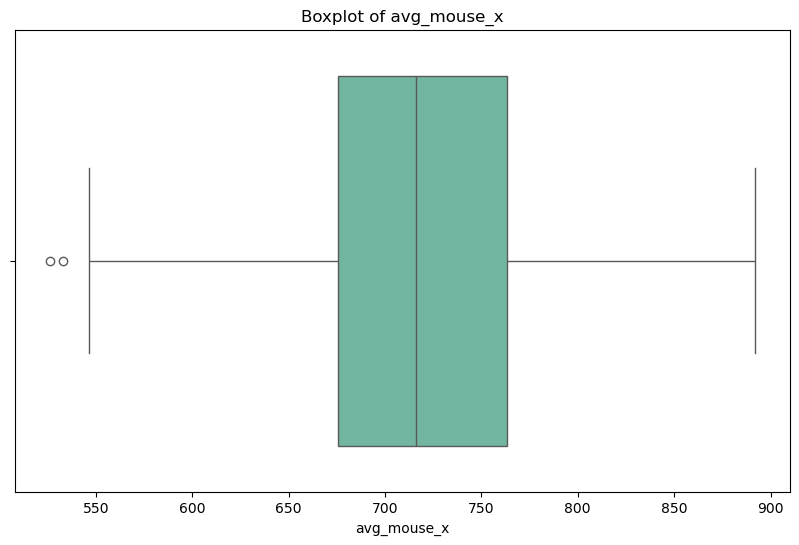

C:\Users\joelf\AppData\Local\Temp\ipykernel_27236\3065027341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set2")


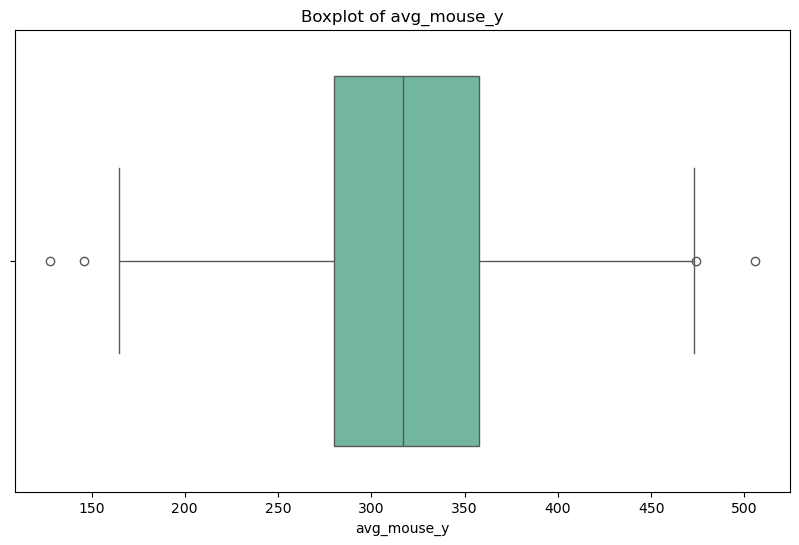

C:\Users\joelf\AppData\Local\Temp\ipykernel_27236\3065027341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set2")


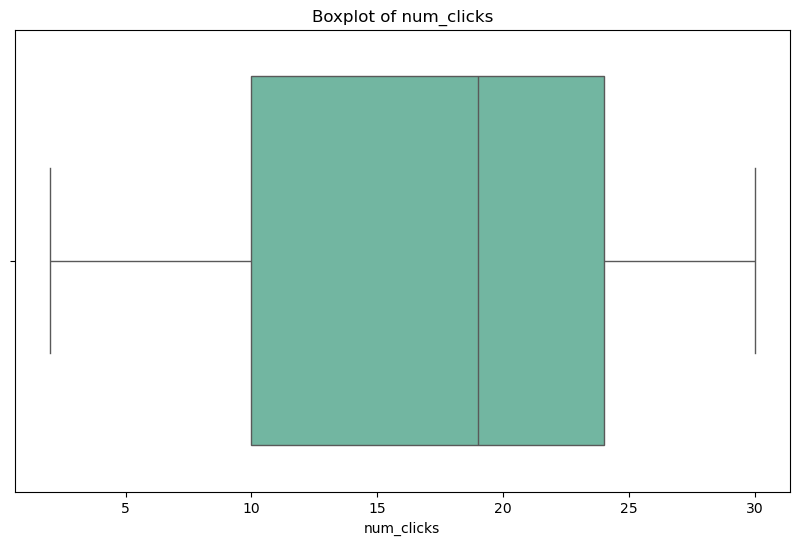

C:\Users\joelf\AppData\Local\Temp\ipykernel_27236\3065027341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set2")


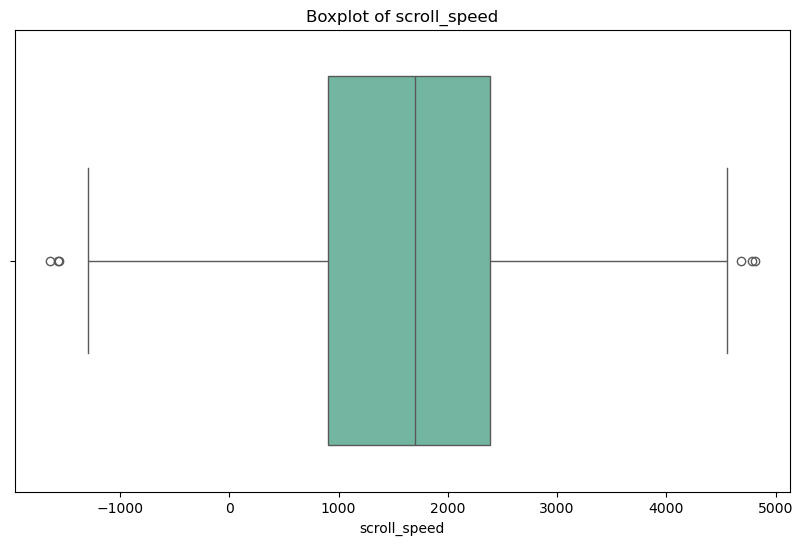

C:\Users\joelf\AppData\Local\Temp\ipykernel_27236\3065027341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], palette="Set2")


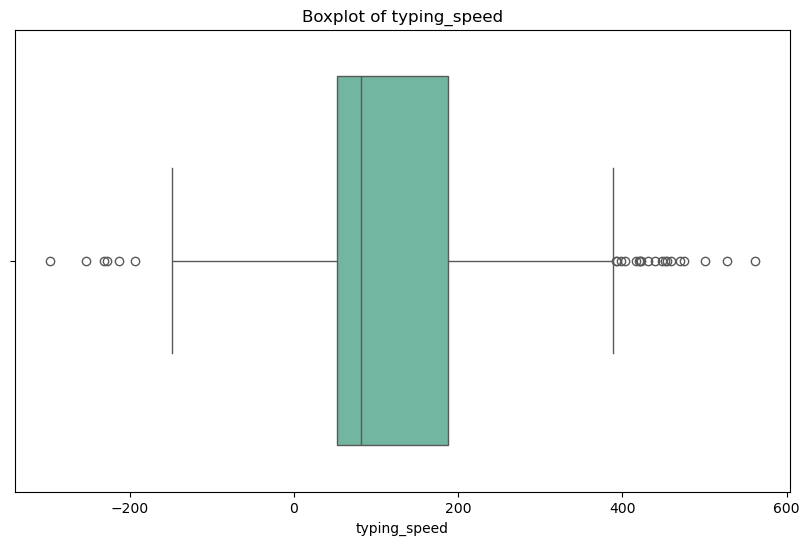

In [13]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [14]:
from scipy.stats import zscore
outliers = data[(np.abs(zscore(data[numerical_columns])) > 3).any(axis=1)]
print("Rows with Potential Outliers:")
print(outliers)

Rows with Potential Outliers:
     avg_mouse_x  avg_mouse_y  num_clicks  scroll_speed  typing_speed  \
32    758.094248   388.083123          25   2742.479644   -253.278814   
129   760.297465   174.553856          10    366.273349   -296.830896   
204   710.424452   284.942919           5    -10.760921    560.991273   
219   754.116277   354.937814           3    833.988899    526.908218   
262   600.200656   505.451557          29   2576.889234     57.857448   
421   685.562067   127.792277          25   -158.665293     70.620652   
524   618.461476   327.034200          14   4034.468532    500.037688   

          label  
32   authorized  
129  authorized  
204  authorized  
219  authorized  
262         bot  
421         bot  
524  authorized  


In [49]:
data['label'] = data['label'].map({'authorized': 1, 'bot': 0})  




In [50]:
data.head()

,avg_mouse_x,avg_mouse_y,num_clicks,scroll_speed,typing_speed,label
0,707.942257,164.724409,14,2761.096476,45.272704,0
1,681.133848,289.858430,5,1331.853986,340.421281,1
2,652.297229,292.005038,3,405.633589,439.889987,1
3,845.972973,396.853282,25,2251.181262,56.071043,0
4,723.574850,395.793413,24,2428.346825,41.191255,0


In [51]:
data.isnull().sum()

avg_mouse_x     0
avg_mouse_y     0
num_clicks      0
scroll_speed    0
typing_speed    0
label           0
dtype: int64

In [52]:

X = data.drop(columns=['label'])
y = data['label']

In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
X

,avg_mouse_x,avg_mouse_y,num_clicks,scroll_speed,typing_speed
0,707.942257,164.724409,14,2761.096476,45.272704
1,681.133848,289.858430,5,1331.853986,340.421281
2,652.297229,292.005038,3,405.633589,439.889987
3,845.972973,396.853282,25,2251.181262,56.071043
4,723.574850,395.793413,24,2428.346825,41.191255
...,...,...,...,...,...
528,679.017711,389.203276,2,1877.078882,82.709192
529,772.381692,288.360023,17,1497.347607,87.319553
530,687.997712,345.234916,25,-104.476462,62.508007
531,693.758454,317.055734,19,1405.393848,54.256890


In [54]:

y

0      0
1      1
2      1
3      0
4      0
      ..
528    1
529    0
530    1
531    1
532    0
Name: label, Length: 533, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
print("\nBaseline Random Forest Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Step 4: 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


print("\nBest Hyperparameters:", grid_search.best_params_)


best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("\nTuned Random Forest Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_tuned))


Baseline Random Forest Performance:
Confusion Matrix:
 [[33 16]
 [23 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.67      0.63        49
           1       0.66      0.57      0.61        54

    accuracy                           0.62       103
   macro avg       0.62      0.62      0.62       103
weighted avg       0.63      0.62      0.62       103


Accuracy Score: 0.6213592233009708
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}

Tuned Random Forest Performance:
Confusion Matrix:
 [[30 19]
 [21 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        49
           1       0.63      0.61      0.62        54

    accuracy                           0.61       103
   macro avg       0.61  

C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
257 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\joelf\anaconda4\Lib\site-packa

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Cm:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Cm:
[[55  4]
 [ 0 48]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.92      1.00      0.96        48

    accuracy                           0.96       107
   macro avg       0.96      0.97      0.96       107
weighted avg       0.97      0.96      0.96       107


Accuracy Score:
0.9626168224299065


In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'C': [0.1, 1.0, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Optimization solvers
    'max_iter': [100, 200, 500]  # Iterations
}

In [56]:
model_path = 'decision_tree_user1.pkl'
joblib.dump(clf, model_path)

print(f"\nModel saved to: {model_path}")


Model saved to: decision_tree_user1.pkl


In [57]:
model = joblib.load("decision_tree_user1.pkl")

In [59]:

import numpy as np




new_input = np.array([
    [250, 350, 23, 2251.181262
, 70.3]  
])


prediction = model.predict(new_input)


label_mapping = {1: 'authorized', 0: 'bot'}
predicted_label = label_mapping[prediction[0]]

print(f"Prediction: {predicted_label}")


Prediction: bot


C:\Users\joelf\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
